# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [206]:
athletes = pd.read_csv('athletes.csv')
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [7]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [207]:
# Sua análise começa aqui
athletes.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [208]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [210]:
def q1():
    # Retorne aqui o resultado da questão 1.
    amostra = get_sample(athletes, 'height', n=3000, seed=42)

    shapiro_test = sct.shapiro(amostra)

    #(0.9961519837379456, 5.681722541339695e-07)
    
    return bool(shapiro_test[1] > 5 / 100)

q1()

False

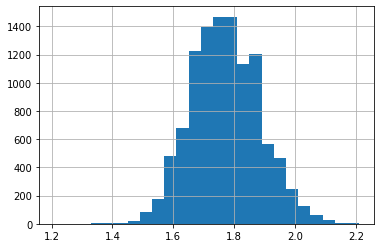

In [169]:
athletes['height'].hist(bins=25)

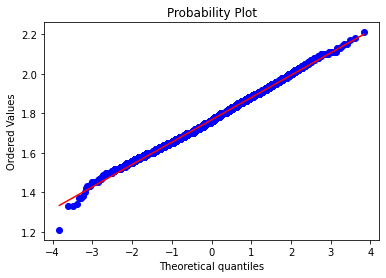

In [170]:
sct.probplot(athletes['height'], dist="norm", plot=plt)
plt.show()

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [212]:
def q2():
    # Retorne aqui o resultado da questão 2.

    amostra = get_sample(athletes, 'height', n=3000, seed=42)
    
    jarque_bera_test = sct.jarque_bera(amostra)

    # (13.03363513594265, 0.001478366424594868)

    return bool(jarque_bera_test[1] > 5 / 100)

q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [213]:
def q3():
    # Retorne aqui o resultado da questão 3.
    amostra = get_sample(athletes, 'weight', n=3000, seed=42)

    # statistic=510.24655809881176, pvalue=1.5898922918029537e-111
    
    normaltest = sct.normaltest(amostra)

    return bool(normaltest[1] > 5 / 100)

q3()

False

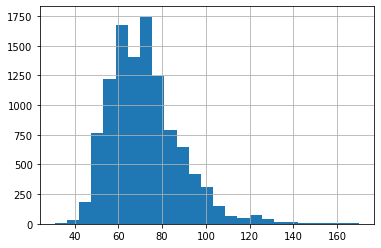

In [173]:
athletes['weight'].hist(bins=25)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [214]:
def q4():
    # Retorne aqui o resultado da questão 4.
    amostra = get_sample(athletes, 'weight', n=3000, seed=42)
    
    amostra_logaritmica = np.log(amostra)

    normaltest = sct.normaltest(amostra_logaritmica)

    # statistic=45.91534331977353, pvalue=1.0705572101256944e-10

    #hist = amostra_logaritmica.hist(bins=25)

    return bool(normaltest[1] > 5 / 100)

q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [221]:
def get_teste_ind(data_frame, var1, var2):

    data_frame.dropna(inplace=True)

    df = data_frame.loc[(data_frame['nationality'] == 'BRA') | (data_frame['nationality'] == 'USA') | (data_frame['nationality'] == 'CAN')]
    
    height_var1 = df.loc[(df['nationality'] == var1), 'height']

    height_var2 = df.loc[(df['nationality'] == var2), 'height']
    
    ttest_ind = sct.ttest_ind(height_var1, height_var2, equal_var=False)

    return ttest_ind

In [222]:
def q5():
    # Retorne aqui o resultado da questão 5.
    teste_ind = get_teste_ind(athletes, 'BRA', 'USA')
    #(statistic=-3.14727748482592, pvalue=0.0016971632943462163)

    return bool(teste_ind[1] > 5 / 100)

q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [223]:
def q6():
    # Retorne aqui o resultado da questão 6.
    teste_ind = get_teste_ind(athletes, 'BRA', 'CAN')
    #(statistic=0.6891977584046214, pvalue=0.49093475791714714)

    return bool(teste_ind[1] > 5 / 100)

q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [224]:
def q7():
    # Retorne aqui o resultado da questão 7.
    teste_ind = get_teste_ind(athletes, 'USA', 'CAN')
    #(statistic=3.517079237516993, pvalue=0.0004660298095223845)

    return 0.00046601
q7()

0.00046603

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?